<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Notebooks/02_Neural_Network_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing tensorflow 
import tensorflow as tf
print(tf.__version__)

2.4.1


# Introduction to Neural Network with Tensorflow 

In this notebook we're going to learn how to write neural networks for classification problem.

A classification is where you try to classify as one thing or another, there are few types of classification:
- Binary Classification
- Multi-Class Classification
- Multi-Label Classification

In [3]:
# Creating data to view and fit, getting a toy data 

from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles 
X , y = make_circles(n_samples , noise = 0.03 , random_state = 42)

In [4]:
# Check out the features / X
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Checking out the labels 
y[:15] # We are working on Binary Classification

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

Our data is little hard to understand now, let's visualize it.

In [6]:
import pandas as pd

# Creating a dataframe with the data
circles = pd.DataFrame({'X0': X[: , 0] , 'X1':X[: , 1] , 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


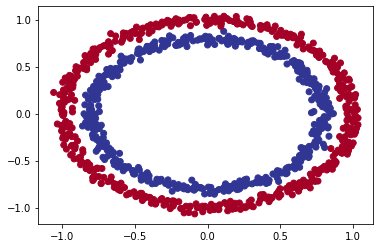

In [7]:
# Visualize the plot 
import matplotlib.pyplot as plt

# Plotting the above data
plt.scatter(X[: , 0] , X[: , 1] , cmap=plt.cm.RdYlBu , c=y);

In [8]:
# Checking the shape of our data 
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working with 
len(X) , len(y)

(1000, 1000)

In [10]:
# Viewing the first example of our features and labels 
X[0] , y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling 

How might we build a classification model to classify whether something is blue dot or red dot.

1. Create a model 
2. Compile the mode
3. Fit the model
4. Evaluate the model 
5. Tweak 
6. Evaluate....

Text(0.5, 0, 'epochs')

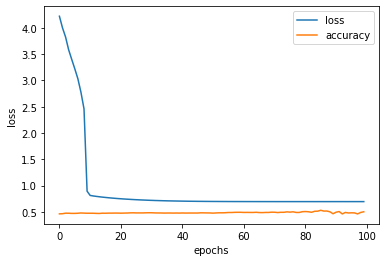

In [11]:
# Taking up the challenge, building a model

# Setting the seed 
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

# Fitting the model 
history = model.fit(X , y , epochs = 100 , verbose = 0)

# Plotting the loss curve 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Following daniel's video to build a model

In [12]:
# Setting the random seed 
tf.random.set_seed(42)

# Creating a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['accuracy'])

# Fit the model 
model_1.fit(X , y , epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5157


It's almost getting 50% correct

In [13]:
# Let's try and improve our model by training longer
model_1.fit(X , y , epochs = 200 , verbose = 0)

In [14]:
 # Evaluating the model 
 model_1.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing. 

So let's add an extra layer and see how our results go.

In [15]:
# Setting the random seed
tf.random.set_seed(42)

# Creating a model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['accuracy'])

# Fit the model
model_2.fit(X , y , epochs = 100 , verbose = 0)

# Evaluate the model 
model_2.fit(X , y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4640


## Improving our model

Let's look into our bag of tricks and see how can we improve the model. 

1. Create a model --> we might need to add more layers (or) increase the number of hidden units within a layer.
2. Compiling a model --> here we might choose a different optimization function.  
3. Fitting a model --> perhaps we might fit our model for more epochs to understand the data better. 


In [16]:
# Set the random seed 
tf.random.set_seed(42)

# Create a model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model
model_3.fit(X , y , epochs = 100 , verbose = 0)

# Evaluate the model 
model_3.evaluate(X , y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

Since our model's performance wasn't improving it's better to visualize of our model's predictions so we could get a glimpse where we're going off.

Let's visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:
- Take in a trained model, feature (X) and labels (y).
- Create a meshgrid of different X values. 
- Make predictions across the mesh grid. 
- Plot the predictions as well as a line between zones (where each unique class falls). 


In [17]:
# Importing numpy 
import numpy as np

def plot_decision_boundary(model , X , y):
  '''
  Plots the decision boundary created by a model predicting on X
  '''
  # Define the axis boundary of the plot and create a meshgrid
  x_min , x_max = X[: , 0].min() - 0.1 , X[: , 0].max() + 0.1   # 0.1 gives the margin
  y_min , y_max = X[: , 1].min() - 0.1 , X[: , 1].max() + 0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max,  100) , np.linspace(y_min , y_max , 100)) # return 100 values equally between those values

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel() , yy.ravel()] # Stack 2D arrays together 

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class 
  if len(y_pred[0]) > 1:
    print('Doing Multi-Class Classification')
    # If so, we have to reshape our predictions to get them plotting
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else: 
    print('Doing Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



Doing Binary Classification


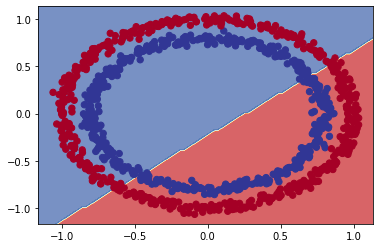

In [18]:
# Check out the predictions our models predicting
plot_decision_boundary(model = model_3 , 
                       X = X , 
                       y = y)

Our model is trying to draw a line which in our case won't help since we are dealing with classification problem. The straight line is a linear decision boundary (line) but here we have a non-linear data (data not lined up in a linear way). 

Whenever your model is performing strangely or there's something going odd, visualize, visualize , visualize.

Let's see if our model can be used for a regression model!


In [19]:
# Create some regression data 
tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100 , 1100 , 5) # the function we're trying to predict is y = x + 10

# Let's split our data in train and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Checkin the shape 
X_reg_train.shape , X_reg_test.shape , y_reg_train.shape ,  y_reg_test.shape

# Fit our model to the regression data 
# model_3.fit(X_reg_train , y_reg_train , epochs = 100)

(TensorShape([150]), TensorShape([50]), TensorShape([150]), TensorShape([50]))

The error is because earlier we compiled our model for the **Binary Classification** problem, but now we're trying to fit a data which doesn't represent a classification problem nor could satisfy our model needs as we described before. 

```
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)
    975           except Exception as e:  # pylint:disable=broad-except
    976             if hasattr(e, "ag_error_metadata"):
--> 977               raise e.ag_error_metadata.to_exception(e)
    978             else:
    979               raise

ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)
```

Let's change our model to deal with the regression model.

In [20]:
# Getting ready for regression data 
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
 tf.keras.layers.Dense(100), 
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['mae'])

# Fit the model
history = model_3.fit(X_reg_train , y_reg_train , epochs = 100 , verbose = 0)

# Evaluating on test data 
model_3.evaluate(X_reg_test , y_reg_test)

2/2 [==============================] - 0s 7ms/step - loss: 57.8962 - mae: 57.8962


[57.89620590209961, 57.89620590209961]

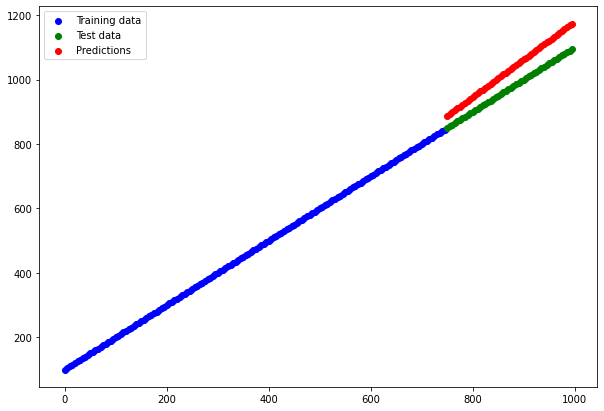

In [21]:
# Make predictions 
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediction against our regression data 
plt.figure(figsize = (10 ,7))
plt.scatter(X_reg_train , y_reg_train , c='b' , label = 'Training data')
plt.scatter(X_reg_test , y_reg_test , c='g' , label ='Test data')
plt.scatter(X_reg_test , y_reg_preds , c='r' , label = 'Predictions')
plt.legend();

We should tweak into Non-linearity (missing piece)

## Non-Linearity



In [22]:
# Let's build a model at first 
tf.random.set_seed(42)

# Create a model 
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1 , activation=tf.keras.activations.linear), # using a activation for our layer

])

# Compile our model 
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

# Fit the model 
history = model_4.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7717 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9152 - accuracy: 0.4201
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.4180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.3986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5076 - accuracy: 0.4451
Epoch 11/

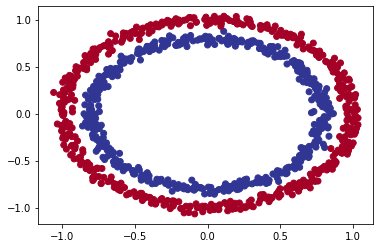

In [23]:
# Check out our data 
plt.scatter(X[: , 0] , X[: , 1] , c=y , cmap = plt.cm.RdYlBu)

Doing Binary Classification


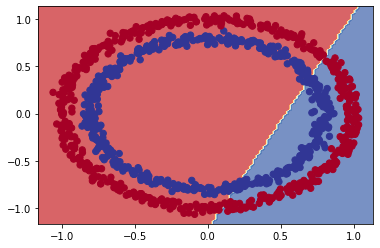

In [24]:
# Check the decision boundary for our latest model 
plot_decision_boundary(model=model_4 , X=X , y=y)

Let's try build our first neural network with a non-linear activation function (anything that isn't linear). 

In [25]:
# Set random seed 
tf.random.set_seed(42)

# Create a model with non-linear activation 
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fit the model 
history = model_5.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7717 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9152 - accuracy: 0.4201
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.4180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.3986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5076 - accuracy: 0.4451
Epoch 11/

Time to replicate the multi-layer neural network from the TensorFlow Playground 

In [26]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001) , 
                metrics = ['accuracy'])

# Fit the model 
history = model_6.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [27]:
# Evaluting the model 
model_6.evaluate(X , y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Let's visualize our model's predictions

Doing Binary Classification


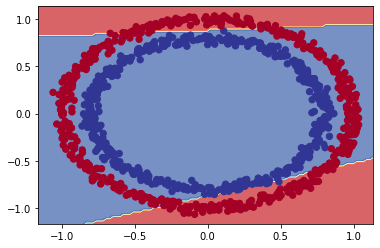

In [28]:
# Using the function 
plot_decision_boundary(model_6 , X , y)

Using the `sigmoid` activation function to our output layer! 

In [29]:
# Final Model!!!!!! 
tf.random.set_seed(42)

# Create model 
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation= tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation= tf.keras.activations.relu) , 
  tf.keras.layers.Dense(1 , activation= tf.keras.activations.sigmoid)
])

# Compile the model 
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001) ,
                metrics = ['accuracy'])

# Fit the model 
history = model_7.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [30]:
# Let's evaluate our model 
model_7.evaluate(X , y )

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

Doing Binary Classification


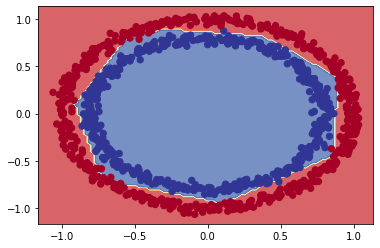

In [31]:
# Let's visualize our great model how it works 
plot_decision_boundary(model_7 , X , y)

🔑  **Note:** The combination of *linear* (straigh lines) and *non-linear* (non straight lines) functions is one of the key fundamentals of neural networks. 

Now we've discussed the concept of linear and non-linear functions (or lines), lets see them in action.

In [32]:
# Create a toy tensor 
A = tf.cast(tf.range(-10 , 10 ) , tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

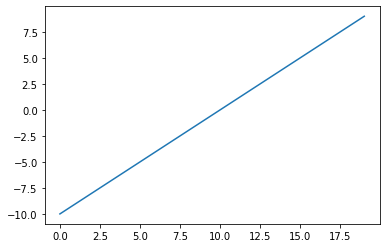

In [33]:
# Visualize our toy tensor --> A linear line 
plt.plot(A)

Let's start by replicating a `sigmoid` function
Formula : `sigmoid(x) = 1 / (1 + exp(-x)).`

In [34]:
# Coding our own one 
def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x))

# Using our function 
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [35]:
# Now using the available tensorflow one 
tf.math.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

([<matplotlib.lines.Line2D at 0x7f7c36e3f450>],
 [<matplotlib.lines.Line2D at 0x7f7c36d29f90>])

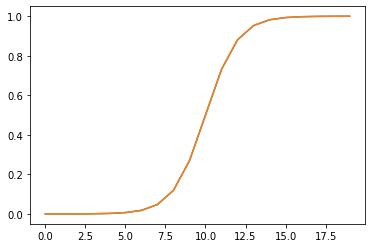

In [36]:
# Let's plot and see how they look 
plt.plot(sigmoid(A)) , plt.plot(tf.math.sigmoid(A))

At first (A) was originally straigh but now using the `sigmoid` we got a non-linear shaped plot above.

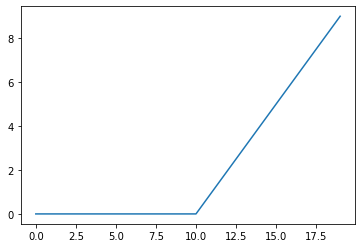

In [37]:
# Creating a relu function 
def relu(x):
  return tf.maximum(0 , x)

# Let's use our toy tensor 
plt.plot(relu(A))

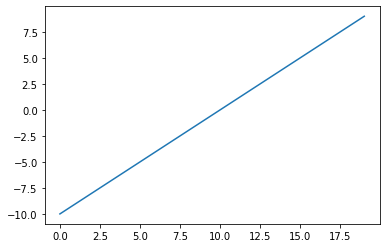

In [38]:
# Using the linear activation function --> which doesn't change anything 
plt.plot(tf.keras.activations.linear(A))

In [39]:
# Does the value got changed 
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

The fact is the `linear` doesn't even made a change to the input data, it just pass by the value onto the network. 

## Evaluating and Improving our Classification

So far we've been training and testing on the same dataset. However in machine learning basically it's a sin.

So let's create a training and test set

In [40]:
# Check how many examples we have 
len(X) 

1000

In [41]:
# Using sklearn to split the data 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shape 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

Let's create a model fit on the training data and evaluate on the test data

In [42]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu), 
  tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Compile the model 
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01) , # how much our modle should improve the model
                metrics = ['accuracy'])

# Fit the model 
history = model_8.fit(X_train , y_train , epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5343
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5528
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5707
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5852
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.5739
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6207
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6297
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7071
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7338
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7815
Epoch 11/25
25/25 [

In [43]:
# Evaluate the model on test data 
model_8.evaluate(X_test , y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.1886371374130249, 0.9449999928474426]

Doing Binary Classification
Doing Binary Classification


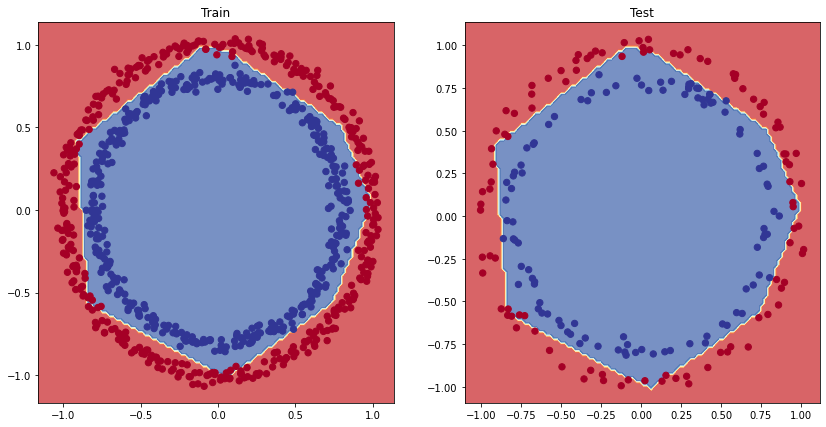

In [44]:
# Plotting the decision boundary for training and test sets 

plt.figure(figsize=(14 , 7))
plt.subplot(1, 2 ,1)
plt.title('Train')
plot_decision_boundary(model_8 , X_train , y_train)
plt.subplot(1 , 2, 2) 
plt.title('Test')
plot_decision_boundary(model_8 , X_test , y_test)

All we did is took the previous model (`model_7`) and tweaked the **learning rate** and increased it by 10 times of the previous learning rate.

#### **Plot the loss (or training) curve**

In [45]:
# Convert history object into a dataframe 
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
5,0.647489,0.59375
6,0.631162,0.62750
7,0.609302,0.69625
8,0.584372,0.72125
9,0.544250,0.76750


Text(0.5, 1.0, 'Model_8 loss curve')

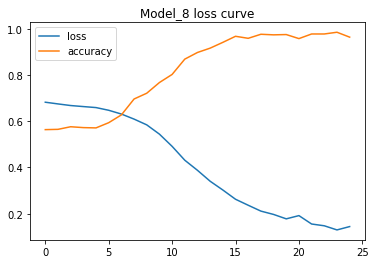

In [46]:
# Plot the loss curve 
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

🔑  **Note:** For many problems the loss function going down means the model is improving (the preds is getting are getting close to the ground truth labels). 

## Find the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during the training) we're going to use the following steps. 
- A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to you model *while* it's training. 
- Another model (we could use same one as above, but we're practicing building models here). 
- A modified loss curve plot

In [47]:
# Set the random seed 
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Compile the model 
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),  
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

# Fit the model (passing lr_scheduler)
history = model_9.fit(X_train, 
            y_train , 
            epochs = 100 , 
            callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5021
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5130
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4774
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4613
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4898
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5203
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5148
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.4975
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5101
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.4962
Epoch 11/

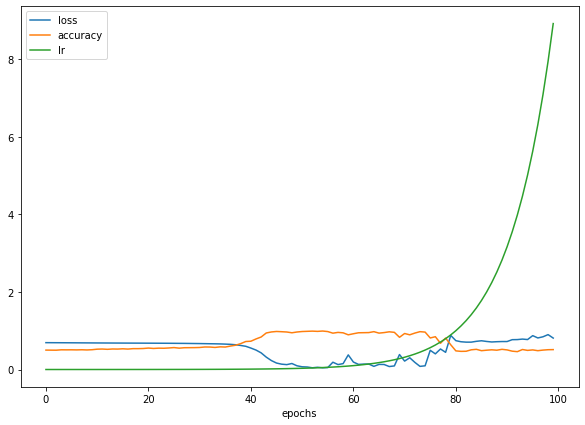

In [48]:
# Check out history 
pd.DataFrame(history.history).plot(figsize = (10 , 7) , xlabel = 'epochs')


In [49]:
# Plot the learning rate vs loss 
lrs = 1e-4 * (10**(tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [50]:
len(lrs) # 100 different values of learning rate

100

Text(0.5, 1.0, 'Learning rate Vs Loss')

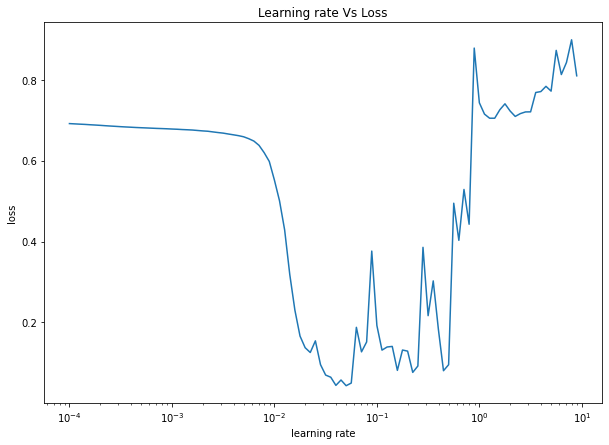

In [51]:
# Plotting 
plt.figure(figsize=(10 , 7))
plt.semilogx(lrs , history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning rate Vs Loss')

In [52]:
# Examples of other typical learning rate 
10**0 , 1e-1 , 1e-2 , 1e-3 , 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
# The ideal learning rate would be 
# model_8 --> lr = 0.01

lr = 0.02 # For model_10

Let's try using a higher *ideal* learning rate with the same model as before. 

In [54]:
# Set random seed 
tf.random.set_seed(42)

# Create the model 
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(5 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(5,  activation= tf.keras.activations.relu),
  tf.keras.layers.Dense(1 , activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                 optimizer = tf.keras.optimizers.Adam(lr = 0.02) , 
                 metrics = ['accuracy'])

# Fit the model 
history_10 = model_10.fit(X_train , y_train , epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5138
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5689
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6028
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6795
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7277
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8645
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.9790
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9943
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9888
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9938
Epoch 11/20
25/25 [

In [55]:
# Evaluate model_10 on the test data 
model_10.evaluate(X_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9900


[0.03806890547275543, 0.9900000095367432]

In [56]:
# Evaluate model_8 on test data 
model_8.evaluate(X_test , y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.1886371374130249, 0.9449999928474426]

Doing Binary Classification
Doing Binary Classification


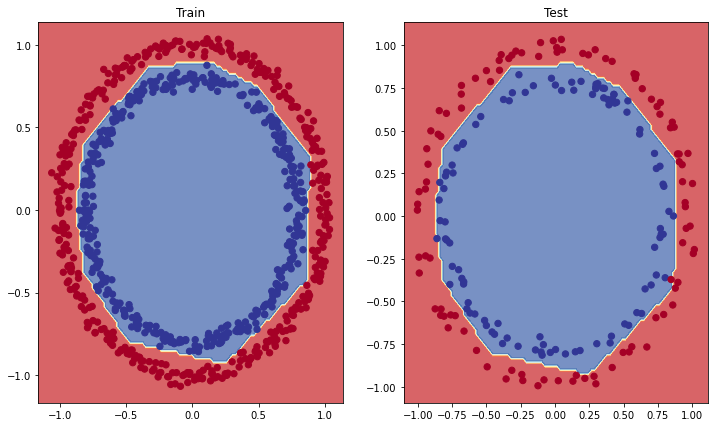

In [57]:
# Plot the decision boundaries for the training and test set 
plt.figure(figsize = (12 , 7))
plt.subplot(1 , 2 , 1)
plt.title('Train')
plot_decision_boundary(model_10 , X_train , y_train)
plt.subplot(1 , 2 , 2)
plt.title('Test')
plot_decision_boundary(model_10 , X_test , y_test)
plt.show()

## More Classification Evaluation Methods

Alongside visualizing our models results as much as possible, there are handful of other classification evaluation methods & metrics you should be familiar with 
- Accuracy 
- Precision 
- Recall 
- F1-Score 
- Confusion Matrix
- Classification Report (from sklearn)

In [58]:
# Check the accuracy of our model 
loss , accuracy = model_10.evaluate(X_test , y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy * 100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9900
Model loss on the test set: 0.03806890547275543
Model accuracy on the test set: 99.00%


Create a confusion matrix from sklearn 

In [59]:
# Import the function 
from sklearn.metrics import confusion_matrix

# Making predictions 
y_pred = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test , y_pred)

Lets inspect what we're trying to prediction on 


```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-73-28ceecf2d8bc> in <module>()
      6 
      7 # Create confusion matrix
----> 8 confusion_matrix(y_test , y_pred)

1 frames
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py in _check_targets(y_true, y_pred)
     88     if len(y_type) > 1:
     89         raise ValueError("Classification metrics can't handle a mix of {0} "
---> 90                          "and {1} targets".format(type_true, type_pred))
     91 
     92     # We can't have more than one value on y_type => The set is no more needed

ValueError: Classification metrics can't handle a mix of binary and continuous targets
```



In [60]:
# Let's inspect our test data 
y_test[:10] 

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [61]:
# Now our predictions 
y_pred[:10]

array([[9.9864417e-01],
       [1.6500785e-03],
       [9.9851769e-01],
       [2.5334134e-04],
       [9.0702468e-01],
       [8.4187913e-01],
       [4.3469926e-04],
       [1.0893223e-04],
       [9.9769503e-01],
       [5.7730847e-04]], dtype=float32)

It seems like our `y_pred` (or) predictions comes out as a value of **prediction probability** form..... the standard output from sigmoid (or softmax) function. 

In [62]:
tf.math.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Convert our prediction probabilities to binary format by using the `tf.math.round` function.

In [63]:
# Creating Confusion Matrix by rounding off the prediction probs

confusion_matrix(y_test , tf.math.round(y_pred))

array([[99,  1],
       [ 1, 99]])

How about we prettify our confusion matrix? 

**Note:** The confusion matrix function we're about to write is a remix of scikit-learn confusion matrix and our own sprinkles. 

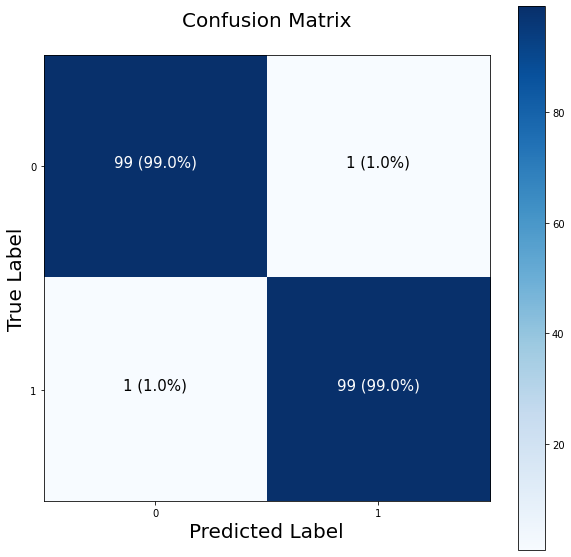

In [64]:
# Building our own plot_confusion_matrix 

import itertools

figsize = (10 , 10)
# Create the confusion matrix 
cm = confusion_matrix(y_test , tf.math.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis = 1)[: , np.newaxis] # normalize our confusion matrix

# Number of classes 
n_classes = cm.shape[0]

# Let's prettify it! 
fig , ax = plt.subplots(figsize = figsize)
# Create a matrix plot 
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False  # we are dealing with binary class, if multi class it would be True and we will do something

if classes:
  labels = classes 
else:
  labels = np.arange(cm.shape[0])

# Label the axes 
ax.set(title ='Confusion Matrix' , 
       xlabel = 'Predicted Label' , 
       ylabel = 'True Label' , 
       xticks = np.arange(n_classes) , 
       yticks = np.arange(n_classes) , 
       xticklabels = labels , 
       yticklabels = labels)

# Set the xaxis labels to bottom 
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust the label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors 
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell 
for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
  plt.text(j , i , f'{cm[i , j]} ({cm_norm[i , j]*100:.1f}%)' , 
           horizontalalignment = 'center' , 
            color = 'white' if cm[i , j] > threshold else 'black' , 
           size = 15)

In [65]:
# Putting everything into a function 
def plot_confusion_matrix():

  # Setting the default fig size 
  figsize = (10 , 10)

  # Creating the confusion matrix 
  cm = confusion_matrix(y_test , tf.math.round(y_pred))
  # Normalizing the confusion matrix 
  cm_norm = cm.astype('float') / cm.sum(axis =1)[: , np.newaxis] 

  # Number of classes 
  n_classes = cm.shape[0] # 2 --> inner and outer circle

  # Making it prettier 
  fig , ax = subplots(figsize = figsize)
  # Create the matrix plot (same one we saw in the confusion matrix)
  cax = ax.matshow(cm , cmap.plt.cm.Blues)
  fig.colorbar(cax)

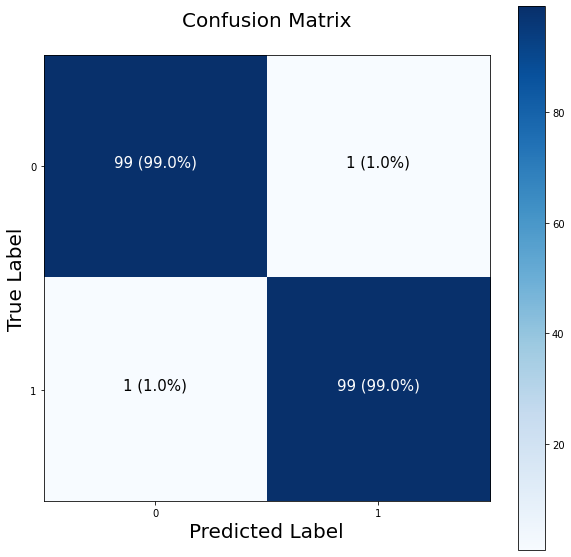

In [66]:
# Building our own plot_confusion_matrix 

import itertools

figsize = (10 , 10)
# Create the confusion matrix 
cm = confusion_matrix(y_test , tf.math.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis = 1)[: , np.newaxis] # normalize our confusion matrix

# Number of classes 
n_classes = cm.shape[0]

# Let's prettify it! 
fig , ax = plt.subplots(figsize = figsize)
# Create a matrix plot 
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False  # we are dealing with binary class, if multi class it would be True and we will do something

if classes:
  labels = classes 
else:
  labels = np.arange(cm.shape[0])

# Label the axes 
ax.set(title ='Confusion Matrix' , 
       xlabel = 'Predicted Label' , 
       ylabel = 'True Label' , 
       xticks = np.arange(n_classes) , 
       yticks = np.arange(n_classes) , 
       xticklabels = labels , 
       yticklabels = labels)

# Set the xaxis labels to bottom 
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust the label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors 
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell 
for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
  plt.text(j , i , f'{cm[i , j]} ({cm_norm[i , j]*100:.1f}%)' , 
           horizontalalignment = 'center' , 
            color = 'white' if cm[i , j] > threshold else 'black' , 
           size = 15)

I have no idea what's going on above, I am gonna break those code line by line and see whether I can understand! And then put them inside a function. 

In [67]:
# Alright now put the whole into a function 

def plot_confusion_matrix(y_test , y_pred):

  # Setting the default figsize 
  figsize = (10 , 10)
  # Create the confusion matrix from sklearn 
  cm = confusion_matrix(y_test , tf.math.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[: , np.newaxis] # Normalize our confusion matrix 

  # Number of clases
  n_classes = cm.shape[0]

  # Making our plot pretty
  fig , ax = plt.subplots(figsize = figsize)
  # Drawing the matrix plot 
  cax = ax.matshow(cm , cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes 
  classes = False # We are dealing with binary class / if multi class it would be True and we will do something 

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label axes
  ax.set(title ='Confusion Matrix' , 
       xlabel = 'Predicted Label' , 
       ylabel = 'True Label' , 
       xticks = np.arange(n_classes) , 
       yticks = np.arange(n_classes) , 
       xticklabels = labels , 
       yticklabels = labels)
  # Set the xaxis labels to bottom 
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust the label size 
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors 
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell 
  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i , f'{cm[i , j]} ({cm_norm[i , j]*100:.1f}%)' , 
           horizontalalignment = 'center' , 
            color = 'white' if cm[i , j] > threshold else 'black' , 
           size = 15)

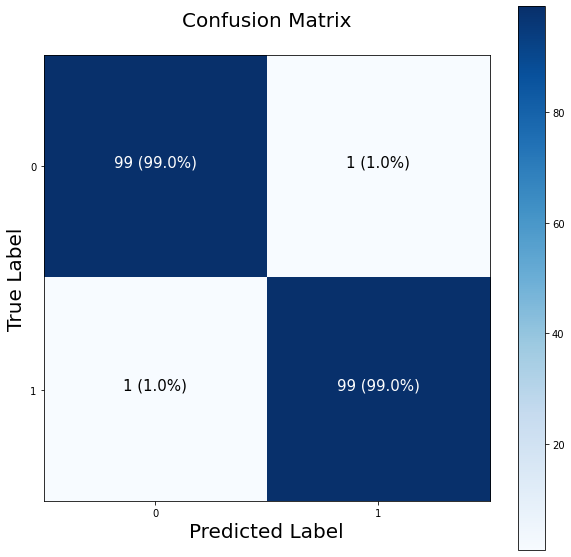

In [68]:
# Using the function 
plot_confusion_matrix(y_test , y_pred) # Booyah! Simple 

### Break the above plot_confusion_matrix function

In [69]:
# At first we are setting a default figsize 
figsize = (10 , 10)

# Creating a confusion matrix (matrix format)
cm = confusion_matrix(y_test , tf.math.round(y_pred))
cm

array([[99,  1],
       [ 1, 99]])

In [70]:
# Normalizing our confusion matrix probabilities (chances)
# From 99 to 0.99 
print(cm.astype('float')) # converting to float from integer

# 

[[99.  1.]
 [ 1. 99.]]


In [71]:
# Sum along the columns
print(cm.sum(axis = 1) , '\n')
print(f'The size of the array: {cm.sum(axis = 1).ndim}, \n')

print('***** Extending the dimension of the array ******')
# Now by using the np.newaxis to turn this 1D array into a 2D array, since we are dealing with 2dim array
print(cm.sum(axis = 1)[: , np.newaxis], '\n') # extending the array

# Normalizing the confusion matrix using the above 2 component
print('****** Normalizing the confusion matrix ****** \n')
cm_norm = cm.astype('float') / cm.sum(axis = 1)[: , np.newaxis]
print(f'After normalizing oru confusion matrix: {cm_norm} ')

[100 100] 

The size of the array: 1, 

***** Extending the dimension of the array ******
[[100]
 [100]] 

****** Normalizing the confusion matrix ****** 

After normalizing oru confusion matrix: [[0.99 0.01]
 [0.01 0.99]] 


In [72]:
# Getting the number of classes 
cm.shape[0] # 2 --> inner circle , outer circle

2

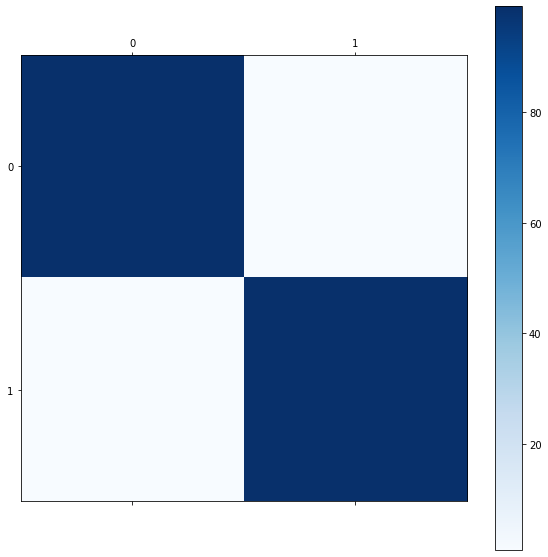

In [73]:
# Using the ax
fig , ax = plt.subplots(figsize = figsize) # plt.subplots() --> returns a tuple (figure , axes objects)

# Creating the matrix plot here 
ax.matshow(cm , cmap = plt.cm.Blues) # Plots a 2d matrix filled with color 
fig.colorbar(ax.matshow(cm , cmap = plt.cm.Blues)) # displays a color bar near the matrix

In [74]:
# Create classes 
classes = False  # we are dealing with binary class, if multi class it would be True and we will do something

if classes: # if False
  labels = classes # in our case this won't get executed
else:
  labels = np.arange(cm.shape[0]) # generates a list of labels (1 , 0) in our case, which is the ouput label (inner or outer circle)

print(f'The labels will look like this: {np.arange(cm.shape[0])}')

The labels will look like this: [0 1]


In [75]:
# Rather using plt. we are setting the labels using axes 

# Label the axes 
ax.set(title = 'Confusion Matrix' , 
       xlabel = 'Predicted Label' , 
       ylabel = 'True Label' , 
       xticks = np.arange(n_classes) , 
       yticks = np.arange(n_classes) , 
       xticklabels = labels , 
       yticklabels = labels) 

[[<matplotlib.axis.YTick at 0x7f7c343612d0>,
 [Text(0, -1.0, '0'), Text(0, 0.0, '1')],
 Text(3.1999999999999886, 0.5, 'True Label'),
 [Text(-1.0, 1, '0'), Text(0.0, 1, '1')],
 Text(0.5, 51.7999999999999, 'Predicted Label'),
 Text(0.5, 1.05, 'Confusion Matrix')]

In [76]:
# Setting the xaxis label, for instance 1 0 at the bottom to top of the plot (like similar one from sklearn)
ax.xaxis.set_label_position('bottom') # Setting the position to move our labels (1 , 0)
ax.xaxis.tick_bottom() # Doing the action / Moving

# Adjusting other label size so it won't mess up with the plot 
ax.yaxis.label.set_size(30) # Setting the labels of yaxis size --> 30
ax.xaxis.label.set_size(20) # Setting the labels of xaxis size --> 30

# Setting the title of the plot size 
ax.title.set_size(20)

# If we look at the confusion matrix of sklearn we do have different color shadings / color threshold for the different results. 
# Now we are doing the same here, tweaking the plot depends on the score (tp,tn,fp,fn) it will provide the color shadings
print((cm.max() + cm.min()) /2 )

50.0


In [77]:
# Now the step is to print those nice text (99% or 1%) on each cell depending upon the score. 
# Here we have 2 classes / binary problem our matrix will be just (2x2) when the labels increase so as the size of the matrix increaes.

# itertools.product() --> iterates and gets the possible outcomes of our input 
for i ,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])): 
  print(i , j) # Below are the possible outcomes of our matrix 

# With this possible outcomes we use it as a coordinate to plot our values / scores on the plot

0 0
0 1
1 0
1 1


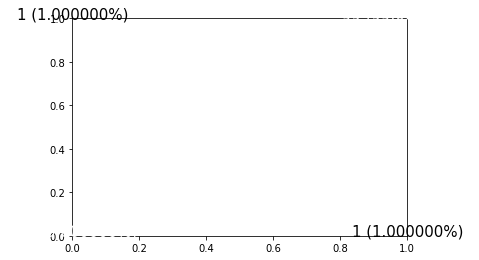

In [78]:
# Now it gets the value or score of (tp , tn , fp , fn) on our plot

for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
  plt.text(j , i , f'{cm[i , j]} ({cm_norm[i , j]*100:1f}%)' , 
           horizontalalignment = 'center' , 
           color = 'white' if cm[i , j] > threshold else 'black' , 
           size = 15)
  
# So we want the alignment of the text to be on the center of each cell (horizontalalignment = 'center')
# And we set the color of our text depending on the threshold of the color of our matrix cell 
# The plot text will be white if the threshold is greater than threshold (99) 
# If it's less than threshold the text color will be black 
# Atlast we set the size of the text to of 15

# Working with a larger example (Multi Class Classification) 

When you have more than two classes as a option it's known as multi-class classification. 
- This means if you have 3 different classes, it's multi-class classification problem. 
- It is also mean if you have 100 different classes, it is known as multi-class classification. 

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [79]:
# Importing tensorflow 
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is also been sorted into training and test sets for us
(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

print(f'***** Printing the shapes ***** \n')
# Checking the shapes of the data we've got 
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

4423680/4422102 [==============================] - 0s 0us/step
***** Printing the shapes ***** 



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [80]:
# Show the first training examples 
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training labels:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [81]:
# Checking the shape of a single example 
train_data[0].shape , test_labels[0].shape

((28, 28), ())

The label of the image is: 7


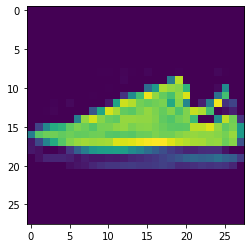

In [82]:
# Let's plot a single example 
import matplotlib.pyplot as plt
plt.imshow(train_data[6])
# Labels
print(f'The label of the image is: {train_labels[6]}')

In [83]:
# Creating a list of class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names) # Output is 10 now

10

In [84]:
# A small helper function to ease up our job
def label_index(index):
  return class_names[train_labels[index]]

Text(0.5, 1.0, 'T-shirt/top')

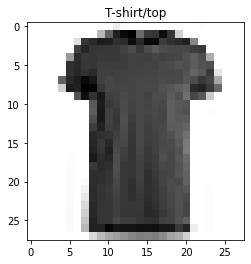

In [85]:
# Plot an example image and label
plt.imshow(train_data[17] , cmap = plt.cm.binary)
plt.title(label_index(17))

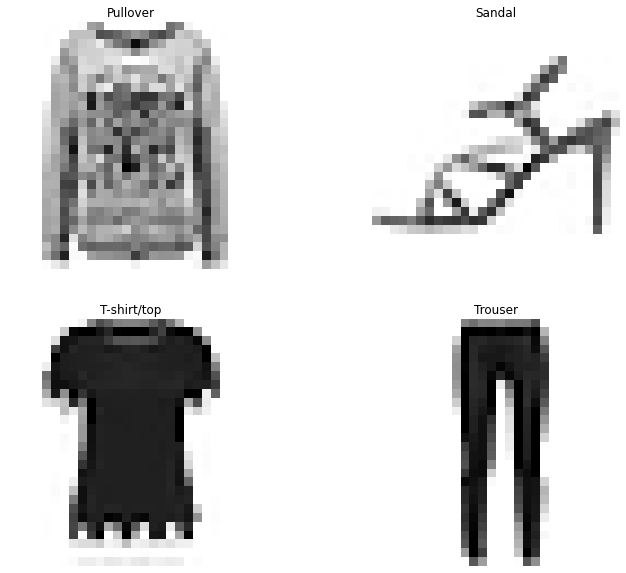

In [86]:
# Plot function which works only for even set of numbers
def plot_train_images(num_of_imgs = 4):
  '''
  num_of_imgs ---> For now try to enter even number of images for instance (2 , 4 , 6, 8............)
  default it prints 4 images
  '''
  num = num_of_imgs
  import random 
  plt.figure(figsize = (12 , 10))
  for i in range(num):
    ax = plt.subplot(num /2, num / 2, i+1)
    rand_index = random.choice(range(len(train_data))) # Pick a random number inside this range(0 , 60000)
    plt.imshow(train_data[rand_index] , cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Using the function we created 
plot_train_images()

In this problem luckily our data is already in tensors we don't wanna do the heavy lifting of converting the data into tensors here  

`!nvidia-smi`

`!nvidia-smi -q -i 0 | grep "Product Name"`

In [87]:
# Checking what GPU we're running with
!nvidia-smi -q -i 0 | grep "Product Name"

    Product Name                          : Tesla T4


## Building a Multi- Class Classification Model 

For our multi-class classification problem we can use similar architecture of binary classifiers, however, we gotta tweak a few things.
- Input shape = `[28,28]`(the shape of one image)
- Ouput shape = 10 (one per class of clothing)
- Loss Function = `tf.keras.CategoricalCrossentropy()`
  - If your labels are one hot encoded use `tf.keas.CategoricalCrossentropy()`
  - If the labels aren't encoded we can use `tf.keas.SparseCategoricalCrossentropy()`
- Output layer activation = `softmax` not sigmoid

The above 3 things are should be looked into if we ever get a shape error.

In [88]:
# Getting the input shape 
train_data[0].shape

(28, 28)

In [89]:
# Getting the output 1 per class name 
len(class_names)

10

In [90]:
# One hot encoding 
tf.one_hot(train_labels[:10], depth = 10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [91]:
# Our data needs to be flattened from 28*28 to 784

flatten_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28 , 28))
])
flatten_model.output_shape

(None, 784)

In [92]:
# Using SparseCategoricalCrossentropy
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28 , 28)) ,  # flattens the input (simplify multiply the shape 28*28 = 784)
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax)
])

# Compile the modle 
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,  # Used Sparse one for using integer type labels rather one hot encoding them
                 optimizer = tf.keras.optimizers.Adam() , 
                 metrics = ['accuracy'])

# Fit the model 
non_norm_history = model_11.fit(train_data , train_labels , epochs = 10 , 
                                validation_data = (test_data , test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8252 - accuracy: 0.1332 - val_loss: 1.8091 - val_accuracy: 0.2042
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7398 - accuracy: 0.2290 - val_loss: 1.6448 - val_accuracy: 0.2803
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6445 - accuracy: 0.2779 - val_loss: 1.6185 - val_accuracy: 0.2799
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6061 - accuracy: 0.2884 - val_loss: 1.6023 - val_accuracy: 0.2977
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6006 - accuracy: 0.2931 - val_loss: 1.5762 - val_accuracy: 0.3231
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5922 - accuracy: 0.3027 - val_loss: 1.6129 - val_accuracy: 0.2854
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5774 - accuracy: 0.3172 - val_loss: 1.5658 - val_accuracy:

In [93]:
# Using CategoricalCrossentropy 
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28 , 28)) ,  # flattens the input (simplify multiply the shape 28*28 = 784)
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax)
])

# Compile the modle 
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy() ,  # Used Sparse one for using integer type labels rather one hot encoding them
                 optimizer = tf.keras.optimizers.Adam() , 
                 metrics = ['accuracy'])

# Fit the model 
cat_non_norm_history = model_12.fit(train_data ,
                                tf.one_hot(train_labels , depth =10), 
                                 epochs = 10 , 
                                validation_data = (test_data , tf.one_hot(test_labels , depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.8251 - accuracy: 0.1333 - val_loss: 1.7893 - val_accuracy: 0.2047
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7418 - accuracy: 0.2293 - val_loss: 1.6516 - val_accuracy: 0.2900
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6459 - accuracy: 0.2809 - val_loss: 1.6080 - val_accuracy: 0.2778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6083 - accuracy: 0.2868 - val_loss: 1.6171 - val_accuracy: 0.2874
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6057 - accuracy: 0.3020 - val_loss: 1.5825 - val_accuracy: 0.3258
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5981 - accuracy: 0.3084 - val_loss: 1.5685 - val_accuracy: 0.3250
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5740 - accuracy: 0.3208 - val_loss: 1.5741 - val_accuracy:

Alright let's define what are all those metrics above really means while we fit the the model and running epochs.
1. `loss` --> this loss is the loss of training data, how wrong our model is and trying to learn the patterns between training data and labels. 
2. `accuracy` --> this is the accuracy % of times it was right of the training data and labels. 
3. `val_loss` --> this will be loss calculated on the validation set. 
4. `val_accuracy` --> accuracy calculated on the validation data. 

It's is because our model results in the training dataset isn't gonna necessarily well onn real world data, it has to generalize well on unseen data. 

In [94]:
# Check the model summary 
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Check the min and max values of train data
train_data.min() , train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor they try to find patterns in between 0 to 1. Right now our data is in scale 0 to 255, we gotta squeeze them within 0 to 1. 

We can get our training and testing data to 0 and 1 by dividing the maximum.

In [96]:
# Normalizing / dividing by 255
train_data_norm = train_data / 255.0
test_data_norm = test_data/ 255.0

# Check the max and mind of train data 
train_data.min() , train_data.max()

(0, 255)

In [97]:
# Creating a model with normalized data 
tf.random.set_seed(42)

# Create the model 
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28 , 28)) ,  # flattens the input (simplify multiply the shape 28*28 = 784)
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax)
])
  
# Compiling the model 
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                 optimizer = tf.keras.optimizers.Adam() , 
                 metrics = ['accuracy'])

# Fit the model 
history = model_13.fit(train_data_norm ,
                       train_labels , 
                       epochs = 10 , 
                       validation_data = (test_data_norm , test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

🔑 **Note:** Neural Networks tend to prefer data in numerical form as well scaled/normalized (numbers between 0-1). 

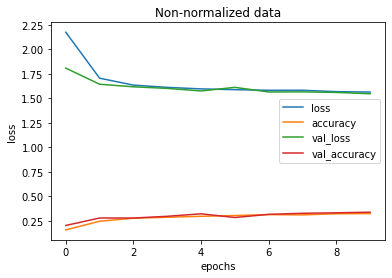

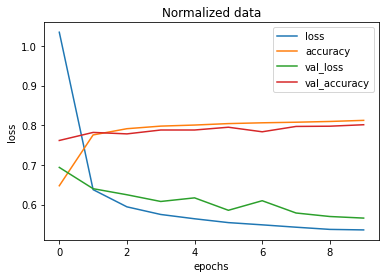

In [98]:
import pandas as pd 
# Plot non-normalized data loss curves 
pd.DataFrame(non_norm_history.history).plot(title = 'Non-normalized data' , xlabel ='epochs' , ylabel='loss')

# Plot the normalized data loss curves 
pd.DataFrame(history.history).plot(title = 'Normalized data' , xlabel ='epochs' , ylabel='loss')

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it is important to make you're comparing them on the same criteria. For instance, 
- Same architecture but different data.
- Same data but different architecture.

## Finding the learning rate 

So let's see whether we could improve our model by finding a ideal learning rate. 

In [99]:
# Set random seed 
tf.random.set_seed(42)

# Create a model 
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28 , 28)),
  tf.keras.layers.Dense(4 , activation='relu') , 
  tf.keras.layers.Dense(4 , activation='relu'), 
  tf.keras.layers.Dense(10 , activation='softmax')
])

# Compile the model 
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                 optimizer = tf.keras.optimizers.Adam() , 
                 metrics = ['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) # Start with 1e-3 and slowly increase the learning rate by 10**()

# Fit the model 
find_lr_history = model_14.fit(train_data_norm , 
                               train_labels , 
                               epochs = 40 , 
                               validation_data = (test_data_norm , test_labels) , 
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

In [100]:
epoch = 0
for value in tf.range(40) / 20: 
  epoch += 1
  print(f'For the {epoch} epoch the learning rate was {1e-3 * 10**value} \n')

For the 1 epoch the learning rate was 0.001 

For the 2 epoch the learning rate was 0.0011220184543019635 

For the 3 epoch the learning rate was 0.0012589254117941673 

For the 4 epoch the learning rate was 0.0014125375446227544 

For the 5 epoch the learning rate was 0.0015848931924611136 

For the 6 epoch the learning rate was 0.001778279410038923 

For the 7 epoch the learning rate was 0.00199526231496888 

For the 8 epoch the learning rate was 0.0022387211385683395 

For the 9 epoch the learning rate was 0.0025118864315095803 

For the 10 epoch the learning rate was 0.0028183829312644544 

For the 11 epoch the learning rate was 0.003162277660168379 

For the 12 epoch the learning rate was 0.003548133892335755 

For the 13 epoch the learning rate was 0.0039810717055349725 

For the 14 epoch the learning rate was 0.004466835921509631 

For the 15 epoch the learning rate was 0.005011872336272723 

For the 16 epoch the learning rate was 0.00562341325190349 

For the 17 epoch the learn

Text(0.5, 1.0, 'Finding the Idea Learning Rate')

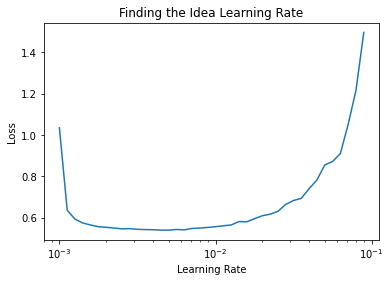

In [101]:
# Now , its time to plot the learning rate curve 
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40) / 20)
plt.semilogx(lrs , find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Idea Learning Rate')

And it seems the idea learning rate is our default learning rate which comes with `Adam(lr = 0.001)`

In [102]:
# So now let's refit a model with the ideal learning rate 

# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28 , 28)),  
  tf.keras.layers.Dense(4 , activation= tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4, activation = tf.keras.activations.relu), 
  tf.keras.layers.Dense(10 , activation= tf.keras.activations.softmax)
])

# Compile the model 
model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001) , 
                 metrics = ['accuracy'])

# Fit the model 
history_15 = model_15.fit(train_data_norm , 
                          train_labels , 
                          epochs = 20 , 
                          validation_data = (test_data_norm , test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

## Evaluating a multi-class classification model

To evaluate our multi-class classification model we could: 
- Evaluate it's performance using other classification metrics (confusion matrix)
- Asses some of it's predictions (through visualization).
- Improve it's result (by training it for longer or changing the architecture)
- Save and export the model for future use. 

Let's go through the top 2 options we could work on for now. 

In [103]:
# Updating the function we made above

def plot_confusion_matrix(y_test , y_pred , classes = None , figsize = (10 , 10) , text_size = 10):

  # Setting the default figsize 
  figsize = figsize
  # Create the confusion matrix from sklearn 
  cm = confusion_matrix(y_test , tf.math.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[: , np.newaxis] # Normalize our confusion matrix 

  # Number of clases
  n_classes = cm.shape[0]

  # Making our plot pretty
  fig , ax = plt.subplots(figsize = figsize)
  # Drawing the matrix plot 
  cax = ax.matshow(cm , cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label axes
  ax.set(title ='Confusion Matrix' , 
       xlabel = 'Predicted Label' , 
       ylabel = 'True Label' , 
       xticks = np.arange(n_classes) , 
       yticks = np.arange(n_classes) , 
       xticklabels = labels , 
       yticklabels = labels)
  # Set the xaxis labels to bottom 
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust the label size 
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors 
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell 
  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i , f'{cm[i , j]} ({cm_norm[i , j]*100:.1f}%)' , 
           horizontalalignment = 'center' , 
            color = 'white' if cm[i , j] > threshold else 'black' , 
           size = text_size)

In [104]:
# Checking our classes 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [105]:
# Make some predictions with our model 
y_probs = model_15.predict(test_data) # prediction probabilities (our output will be prediction probabilities)

# Viewing the first 5 predictions 
y_probs[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

It gives us the index of the label, it seems we predicted with a wrong test_data. 

In [106]:
# Check the 2 different test data
test_data[0] , test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

> 🔑 **Note** Remember to make predictions on the same kind of data your model trained on. (e.g if your model was trained on normalized data, you'll want to make predictions on the normalized data). 

In [107]:
# Using the data we trained on
y_probs = model_15.predict(test_data_norm)

# Checking 5 predictions 
y_probs[:5]

array([[8.5630308e-11, 3.5362037e-13, 2.6633830e-05, 4.6356206e-08,
        5.0949908e-05, 9.6119389e-02, 8.1778360e-08, 9.1868676e-02,
        4.0605222e-03, 8.0787367e-01],
       [3.4278485e-06, 1.2899363e-16, 9.5989138e-01, 2.0516217e-07,
        1.5329252e-02, 2.4532335e-13, 2.4142893e-02, 1.1383361e-28,
        6.3271890e-04, 4.4789381e-08],
       [6.1063125e-05, 9.9657673e-01, 4.3867143e-08, 3.3405898e-03,
        1.3249549e-05, 1.4383215e-21, 8.2790766e-06, 7.3236901e-18,
        5.4811817e-08, 4.9225333e-14],
       [7.5031799e-05, 9.9053699e-01, 4.2528902e-07, 9.2231864e-03,
        1.3623247e-04, 1.8276374e-18, 2.6808424e-05, 4.8124289e-14,
        1.4521634e-06, 2.2211634e-11],
       [7.2189957e-02, 1.5495748e-06, 2.5566906e-01, 1.0363142e-02,
        4.3541357e-02, 1.1069363e-13, 6.1693001e-01, 6.7542845e-23,
        1.3049210e-03, 1.2140333e-09]], dtype=float32)

In [108]:
# Viewing a single prediction probability 
print(y_probs[0], "\n")  
print(f'The label is at the index: {tf.argmax(y_probs[0])}') # Gives us the index where the maximum value occurs

[8.5630308e-11 3.5362037e-13 2.6633830e-05 4.6356206e-08 5.0949908e-05
 9.6119389e-02 8.1778360e-08 9.1868676e-02 4.0605222e-03 8.0787367e-01] 

The label is at the index: 9


In [109]:
# Checking the above index in our class_names list to find which label was predicted! 
print(f'Our model predicted it was: {class_names[9]}')

Our model predicted it was: Ankle boot


In [110]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1) 

# View the first 10 prediction labels 
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [111]:
# Gets the maximum value in each of the column / prediction probability
len(y_probs.argmax(axis = 1)) # On our test labels

10000

In [112]:
# Create a confusion matrix, boring one
confusion_matrix(y_true = test_labels , 
                 y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

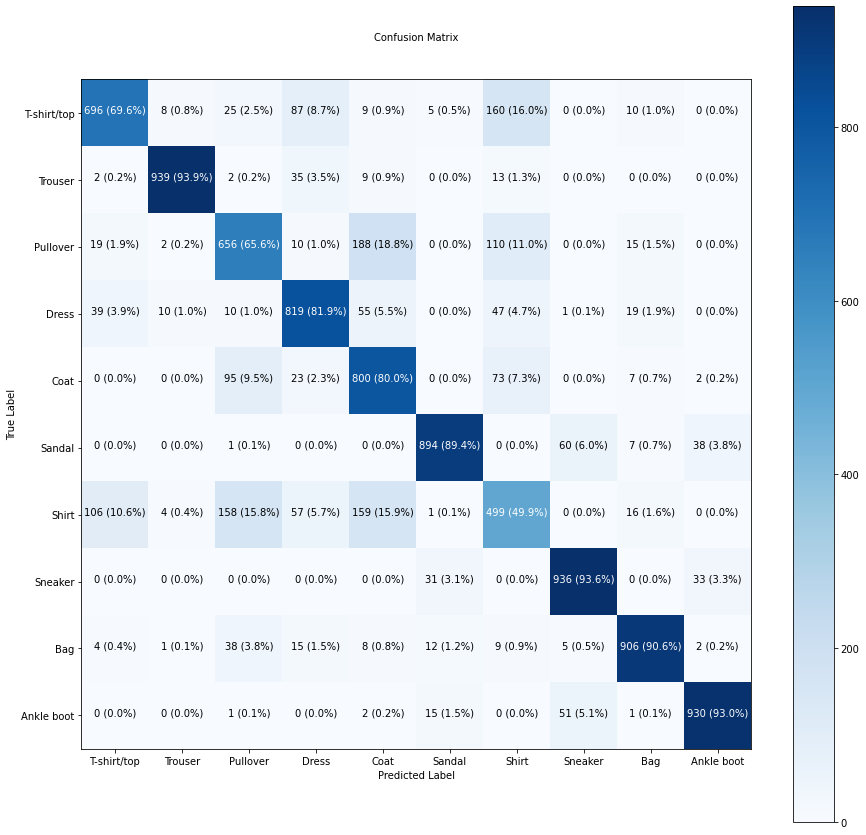

In [113]:
# Make a prettier confusion matrix 
plot_confusion_matrix(y_test= test_labels , 
                      y_pred = y_preds , 
                      classes = class_names , 
                      figsize = (15 , 15) , 
                      text_size = 10)

> 🔑 **Note:** Often when working with images or other forms of visual data it is good idea to visualize as much as possible to develop a further understanding of the data and the inputs and ouputs of your model.

How about we create a fun little function for: 
* Plot a random image 
* Make a predcitions on said image. 
* Label the plot with truth and predicted label.

In [114]:
# Creating the funciton 
import random 

def plot_random_image(model , images , true_labels , classes):
  '''
  Picks a random image, plots it and labels it with a prediction and true label
  '''

  # Set up random integer
  i = random.randint(0 , len(images))

  # Create predictions and targets 
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1 , 28 , 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image , cmap = plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  # Add xlabel information (prediction / true_label)
  plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True:{true_label})' , 
             color = color) # Set the color to green or red

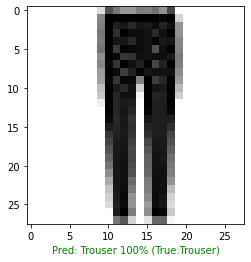

In [115]:
# Check out our newly created function.
plot_random_image(model = model_15 , 
                  images = test_data_norm ,  # always make predictions on the same kind of data your model was trained on 
                  true_labels = test_labels , 
                  classes = class_names)

In [116]:
# Gives a random number between this range (0 , 60000)
random.randint(0 , len(test_data))

6756

### What **patterns** our model is learning? 

In [118]:
# Find the layers of our most recent model 
model_15.layers

In [119]:
# Extract a particular layer
model_15.layers[1]

We can find the patterns learnt by a particular layer using the `get_weights()` method.

In [120]:
# Get the patterns of a layer in our network
weights , biases = model_14.layers[1].get_weights()

In [126]:
# Shapes of the weights and biases 
print(f'{weights} \n') 
weights.shape 

[[  3.7378154   -6.2965837    3.6907475  -14.926056  ]
 [ -3.560059     1.7308673    7.9784985   -6.9598155 ]
 [  8.253049     0.380849     0.47839367 -19.230625  ]
 ...
 [ -4.716106    10.169074    -0.37870482  -4.1411886 ]
 [-15.34161     17.049242     1.3971496    2.5612562 ]
 [  2.4041076    0.873624     3.2670472   -5.6640105 ]] 



(784, 4)

The above random numbers seems more like a patterns to our neural network which help them to learn our data.

In [128]:
# Where 784 comes from 
28 * 28 # Our input layer

784

In [129]:
# Let's check the summary of our model 
model_15.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_42 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#### Let's check the bias vector

In [131]:
# Bais and biases shape 
biases , biases.shape # this is from a single layer 

(array([ 5.682521, 17.960896, -7.238554, 16.286129], dtype=float32), (4,))

**The key difference between a bias vector and weights matrix:** 
- For every hidden unit in our neural network in our first layer it has one bias vector. 
- Whereas in our weights matrix, has one value per *data point (784)* where the biases vector has one value *per hidden unit (4)*.

Every neuron has a bias vector, each of these paired with a weights matrix.

The bias vector get intialized as `zeros` atleast in the case of a TesnsorFlow Dense layer. This bias vector dictates how much the patterns within the corresponding weights matrix should influece the next layer. 

In [132]:
model_15.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_42 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [134]:
w , b = model_15.layers[2].get_weights()
w.shape 

(4, 4)

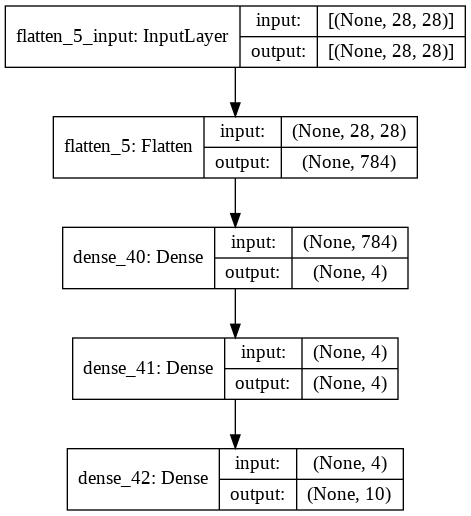

In [135]:
# Let's check out another way of viewing our deep learning models 
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_15 , show_shapes = True) # None --> batch size 